# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

In [ ]:
import pandas as pd

# Memuat dataset
file_path = '../data/combined_financial_data_idx.csv'
data = pd.read_csv(file_path)

# Menampilkan beberapa baris awal dari dataset
print("Beberapa baris awal dari dataset:")
print(data.head())

# Menampilkan jumlah baris dan kolom
print("Jumlah baris dan kolom:", data.shape)

# Memastikan dataset tidak memiliki label
if 'label' in data.columns:
    print("Dataset memiliki label, silakan pilih dataset lain.")
else:
    print("Dataset tidak memiliki label. Melanjutkan analisis...")

# Menampilkan tipe data setiap kolom
print("Tipe data setiap kolom:")
print(data.dtypes)

# Memastikan jumlah baris memenuhi syarat
if data.shape[0] < 1000:
    print("Dataset kurang dari 1000 baris, silakan pilih dataset lain.")
else:
    print("Dataset memenuhi syarat jumlah baris.")

# Memisahkan kolom kategorikal dan numerikal
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns.tolist()

print("Kolom Kategorikal:", categorical_columns)
print("Kolom Numerikal:", numerical_columns)


Beberapa baris awal dari dataset:
  symbol                                     account type          2020  \
0   AALI                            Accounts Payable   BS  7.702640e+11   
1   AALI                         Accounts Receivable   BS  7.658490e+11   
2   AALI                    Accumulated Depreciation   BS -1.092095e+13   
3   AALI                  Additional Paid In Capital   BS  3.878995e+12   
4   AALI  Allowance For Doubtful Accounts Receivable   BS -2.426100e+10   

           2021          2022          2023  
0  1.026717e+12  1.224423e+12  8.420640e+11  
1  4.581350e+11  8.487700e+11  6.744870e+11  
2 -1.213381e+13 -1.330375e+13 -1.443685e+13  
3  3.878995e+12  3.878995e+12  3.878995e+12  
4 -2.454300e+10 -2.705700e+10 -2.651600e+10  
Jumlah baris dan kolom: (89243, 7)
Dataset tidak memiliki label. Melanjutkan analisis...
Tipe data setiap kolom:
symbol      object
account     object
type        object
2020       float64
2021       float64
2022       float64
2023       f

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [ ]:
# Membaca dataset
file_path = '../data/combined_financial_data_idx.csv' 
data = pd.read_csv(file_path)

# Tampilkan kolom dalam dataset
print("Kolom dalam dataset:")
print(data.columns)

Kolom dalam dataset:
Index(['symbol', 'account', 'type', '2020', '2021', '2022', '2023'], dtype='object')


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89243 entries, 0 to 89242
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   symbol   89243 non-null  object 
 1   account  89243 non-null  object 
 2   type     89243 non-null  object 
 3   2020     83988 non-null  float64
 4   2021     84474 non-null  float64
 5   2022     83634 non-null  float64
 6   2023     69831 non-null  float64
dtypes: float64(4), object(3)
memory usage: 4.8+ MB
None
Missing values:
 2020     5255
2021     4769
2022     5609
2023    19412
dtype: int64
Jumlah nilai hilang setelah pembersihan:
symbol     0
account    0
type       0
2020       0
2021       0
2022       0
2023       0
dtype: int64


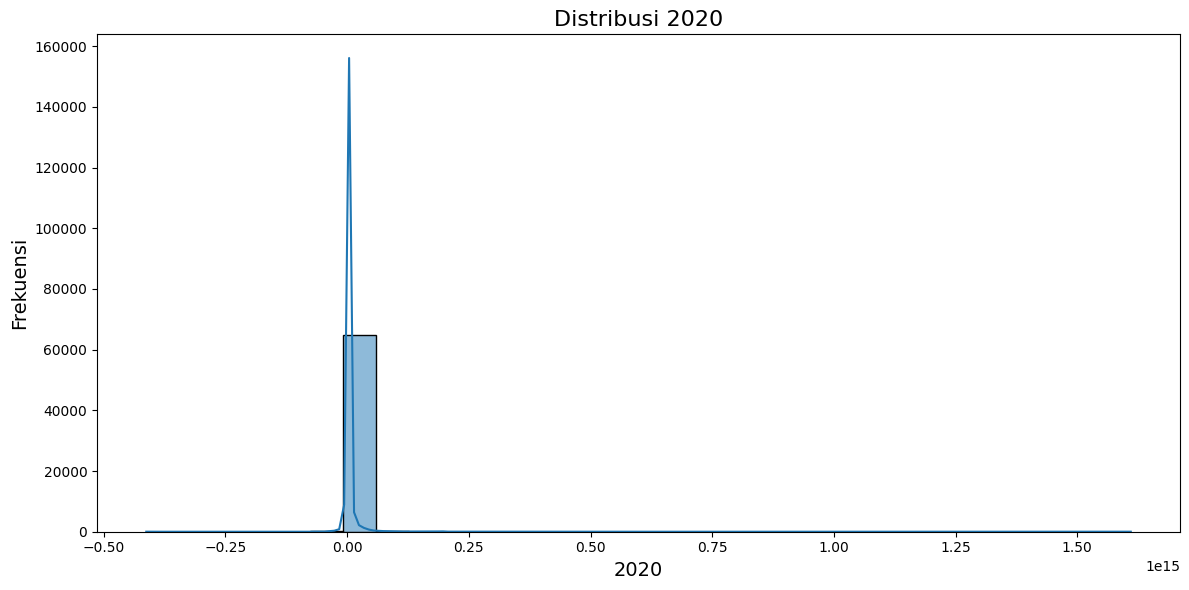

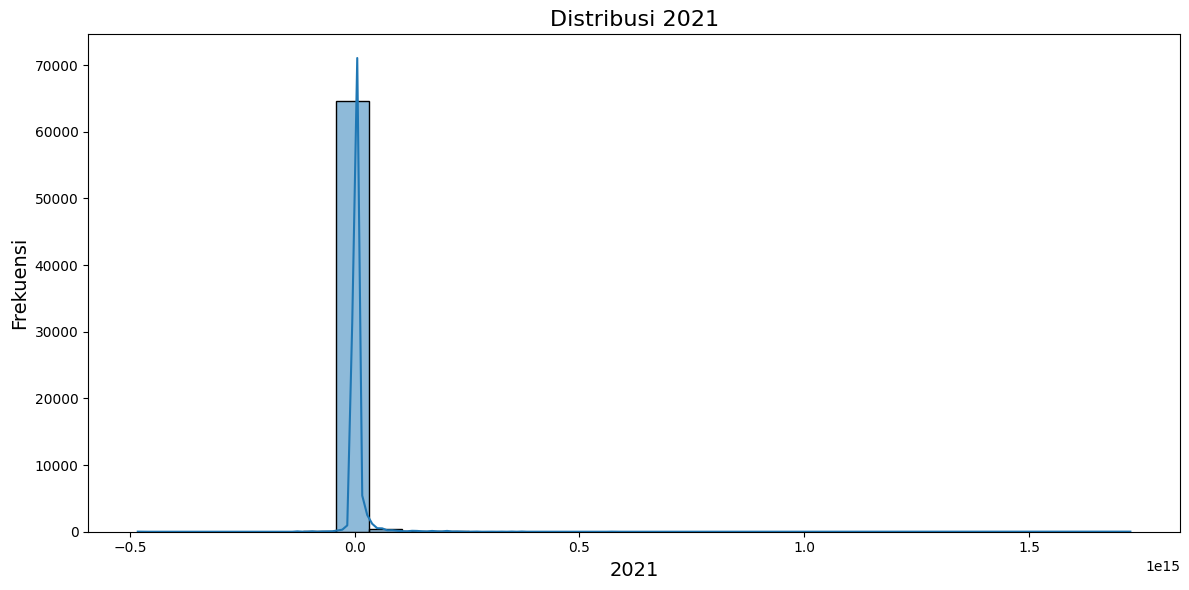

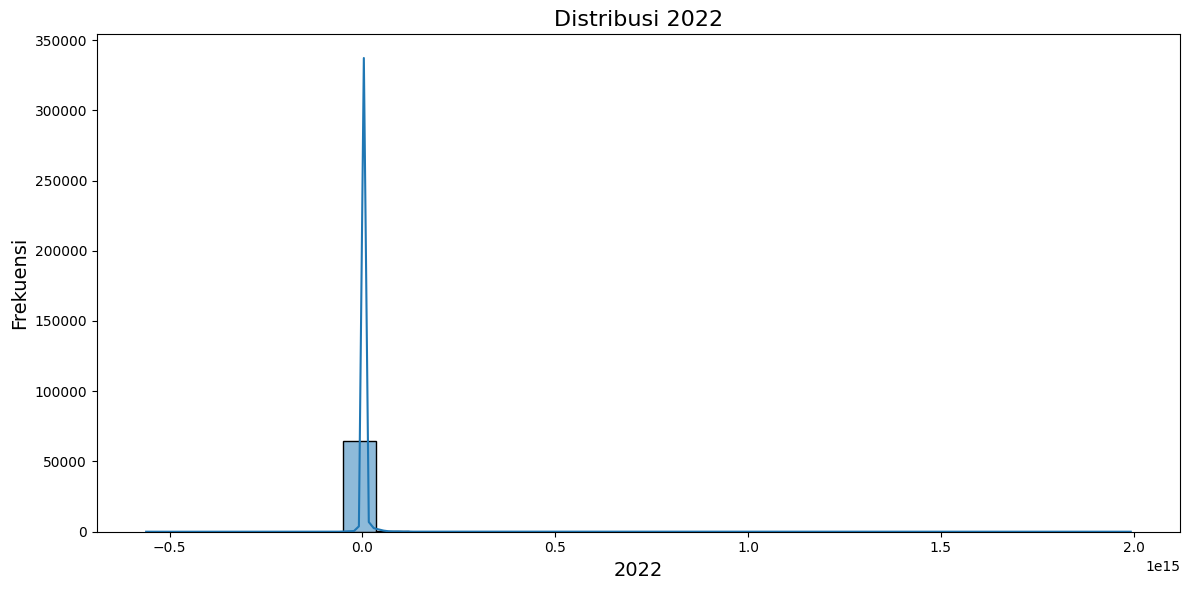

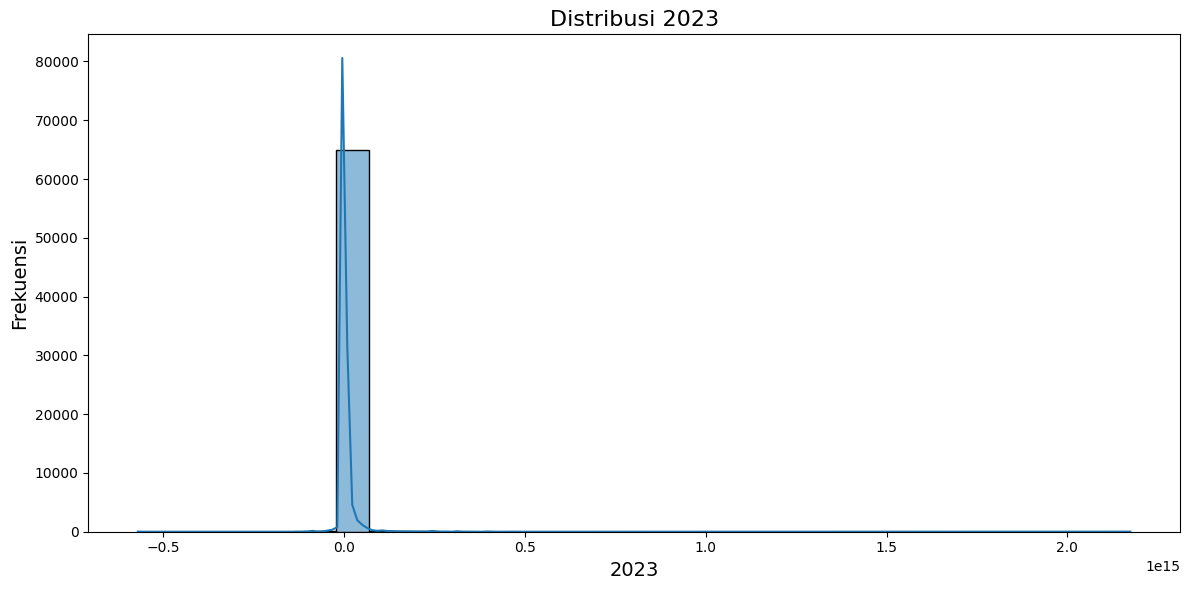

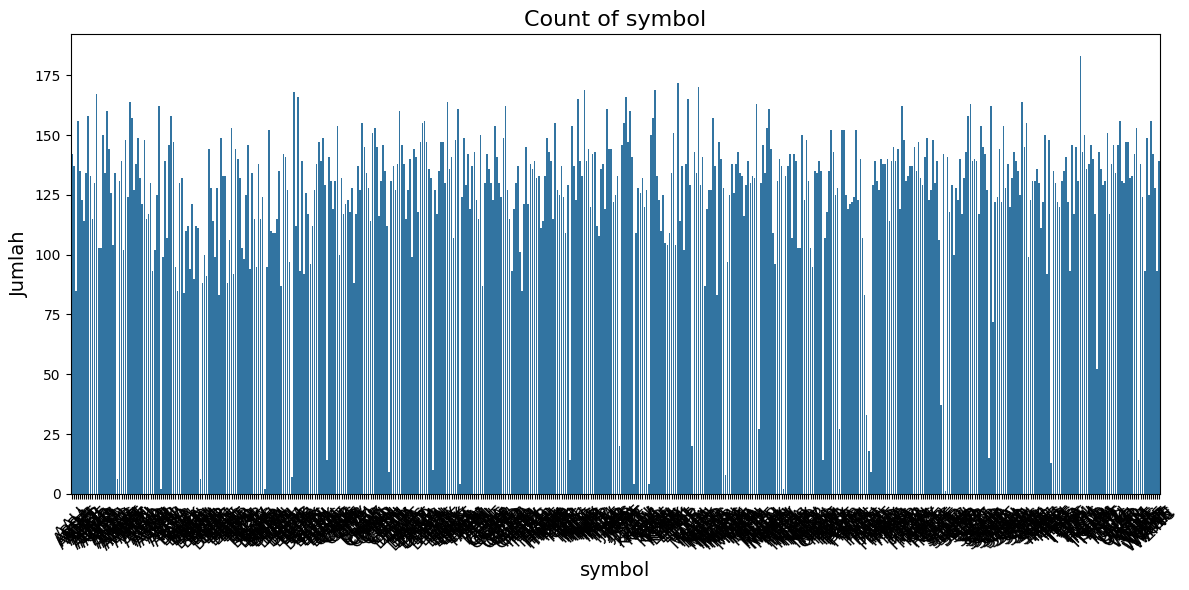

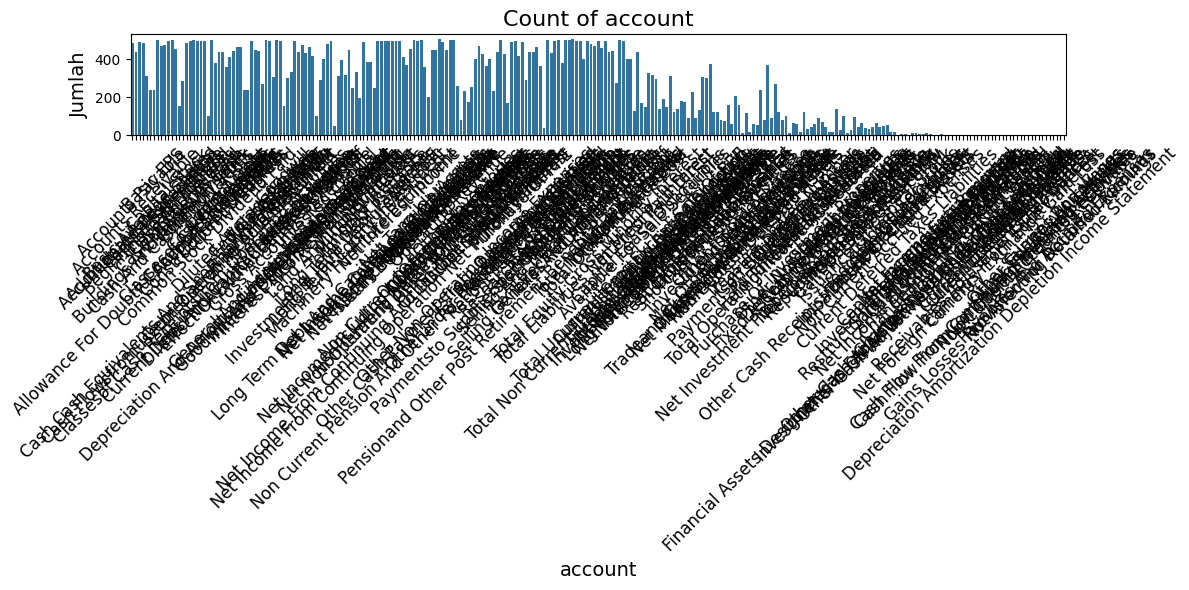

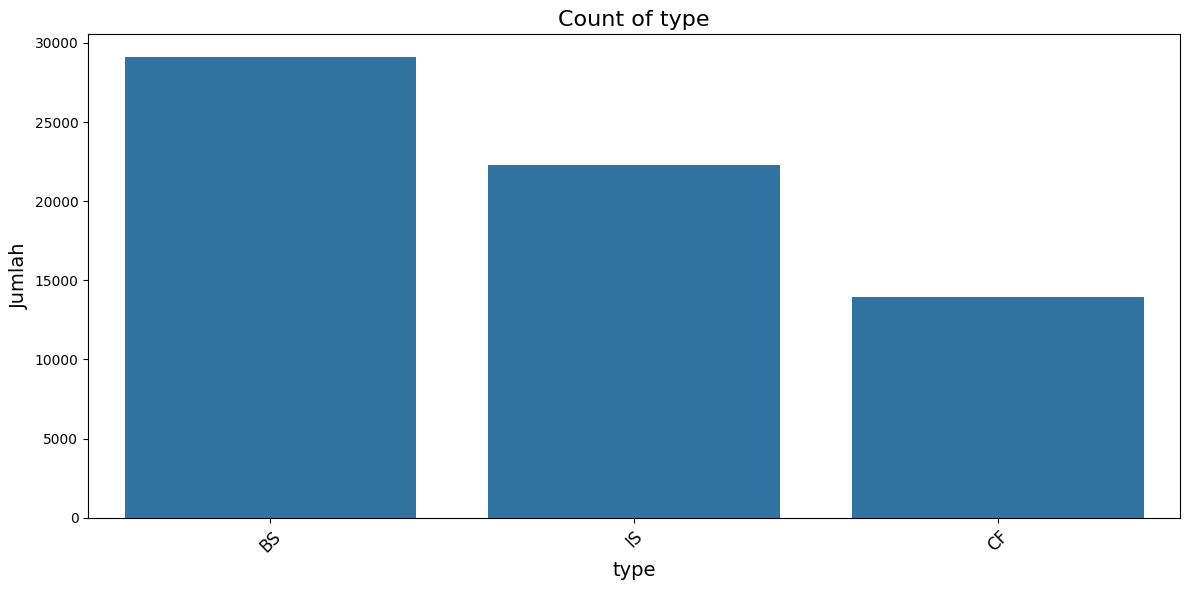

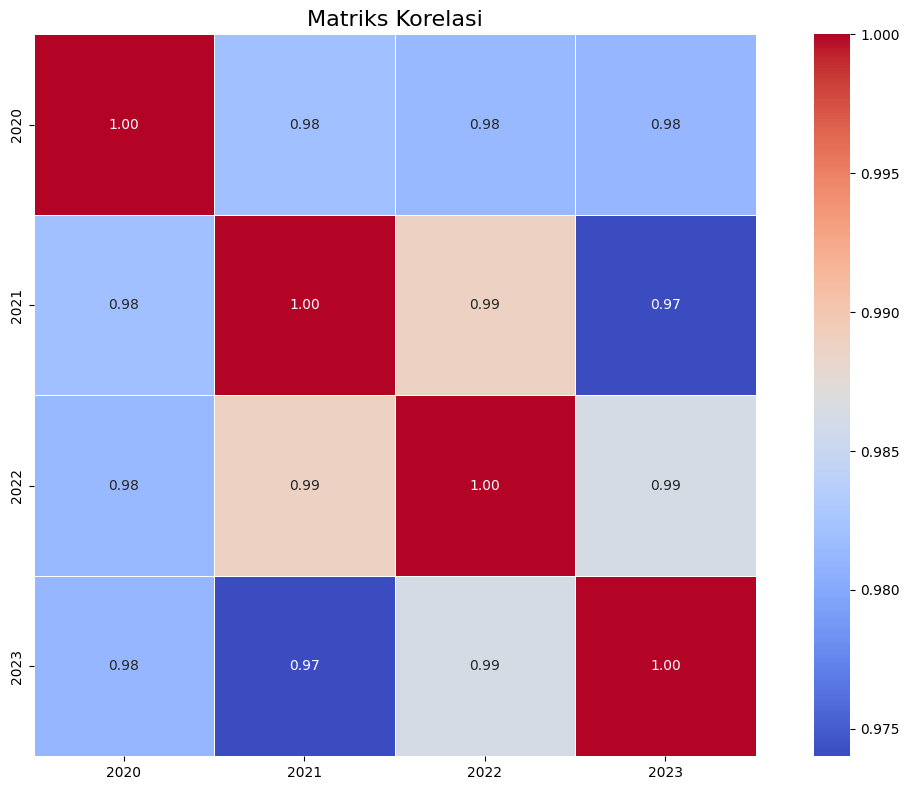

In [ ]:
# Memahami struktur data
print(data.info())

# Menangani nilai yang hilang
missing_values = data.isnull().sum()
print("Missing values:\n", missing_values[missing_values > 0])

# Menghapus baris dengan nilai yang hilang
data.dropna(inplace=True)

# Menampilkan nilai hilang setelah pembersihan
print("Jumlah nilai hilang setelah pembersihan:")
print(data.isnull().sum())

# Analisis distribusi variabel numerik
for column in numerical_columns:
    plt.figure(figsize=(12, 6))
    sns.histplot(data[column], bins=30, kde=True)
    plt.title(f'Distribusi {column}', fontsize=16)
    plt.xlabel(column, fontsize=14)
    plt.ylabel('Frekuensi', fontsize=14)
    plt.tight_layout()
    plt.show()

# Analisis variabel kategorikal
for column in categorical_columns:
    plt.figure(figsize=(12, 6))
    sns.countplot(x=column, data=data)
    plt.title(f'Count of {column}', fontsize=16)
    plt.xlabel(column, fontsize=14)
    plt.ylabel('Jumlah', fontsize=14)
    plt.xticks(rotation=45, fontsize=12)
    plt.tight_layout()
    plt.show()

# Matriks korelasi untuk variabel numerik
correlation_matrix = data[numerical_columns].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True, square=True, linewidths=.5)
plt.title('Matriks Korelasi', fontsize=16)
plt.tight_layout()
plt.show()


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang perlu dilakukan, namun **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

In [ ]:
# Menghapus atau Menangani Data Kosong (Missing Values)
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
data.loc[:, numerical_columns] = data[numerical_columns].fillna(data[numerical_columns].mean())

# Menghapus Data Duplikat
data.drop_duplicates(inplace=True)

# Memeriksa kolom kategorikal
categorical_columns = data.select_dtypes(include=['object', 'category']).columns.tolist()
data.loc[:, categorical_columns] = data[categorical_columns].fillna('missing')

# Normalisasi atau Standarisasi Fitur
scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Encoding Data Kategorikal
encoder = OneHotEncoder(sparse_output=False)
encoded_categorical = encoder.fit_transform(data[categorical_columns])
encoded_categorical_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(categorical_columns))

# Menggabungkan data
X = pd.concat([data[numerical_columns].reset_index(drop=True), encoded_categorical_df.reset_index(drop=True)], axis=1)

# Memeriksa hasil
print(X.head())


       2020      2021      2022      2023  symbol_AALI  symbol_ABBA  \
0 -0.038619 -0.034022 -0.026899 -0.043969          1.0          0.0   
1 -0.038874 -0.063454 -0.044593 -0.051455          1.0          0.0   
2 -0.714070 -0.715277 -0.711233 -0.726477          1.0          0.0   
3  0.140986  0.113627  0.098142  0.091691          1.0          0.0   
4 -0.084522 -0.088440 -0.085848 -0.082768          1.0          0.0   

   symbol_ABDA  symbol_ABMM  symbol_ACES  symbol_ACST  ...  \
0          0.0          0.0          0.0          0.0  ...   
1          0.0          0.0          0.0          0.0  ...   
2          0.0          0.0          0.0          0.0  ...   
3          0.0          0.0          0.0          0.0  ...   
4          0.0          0.0          0.0          0.0  ...   

   account_Tradeand Other Payables Non Current  account_Trading Securities  \
0                                          0.0                         0.0   
1                                          0

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [ ]:
print("Memulai proses clustering...")
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X)

# Menghitung Silhouette Score
silhouette_avg = silhouette_score(X, labels)

# Mengurangi dimensi untuk visualisasi
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Menambahkan label cluster ke DataFrame
data['Cluster'] = labels

# Tampilkan data dengan label cluster
print("Data dengan Label Cluster:")
print(data.head())


Memulai proses clustering...
Data dengan Label Cluster:
  symbol                                     account type      2020      2021  \
0   AALI                            Accounts Payable   BS -0.038619 -0.034022   
1   AALI                         Accounts Receivable   BS -0.038874 -0.063454   
2   AALI                    Accumulated Depreciation   BS -0.714070 -0.715277   
3   AALI                  Additional Paid In Capital   BS  0.140986  0.113627   
4   AALI  Allowance For Doubtful Accounts Receivable   BS -0.084522 -0.088440   

       2022      2023  Cluster  
0 -0.026899 -0.043969        2  
1 -0.044593 -0.051455        2  
2 -0.711233 -0.726477        2  
3  0.098142  0.091691        2  
4 -0.085848 -0.082768        2  


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

Index(['symbol', 'account', 'type', '2020', '2021', '2022', '2023'], dtype='object')


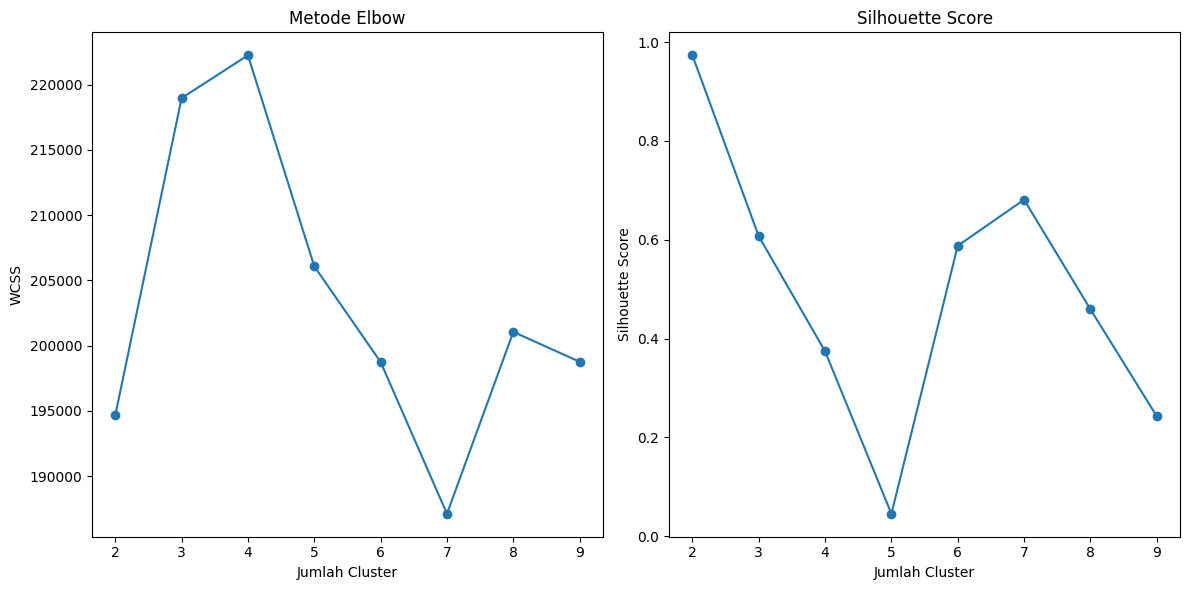

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score

# Memuat dataset
data = pd.read_csv('../data/combined_financial_data_idx.csv')

# Tampilkan nama kolom untuk memeriksa
print(data.columns)

# Memilih kolom yang relevan untuk clustering
numerical_columns = ['2020', '2021', '2022', '2023']  
X = data[numerical_columns].dropna()  

# Standarisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Metode Elbow dan Silhouette Score
wcss = []
silhouette_scores = []
cluster_range = range(2, 10)

for n_clusters in cluster_range:
    kmeans = MiniBatchKMeans(n_clusters=n_clusters, random_state=42, batch_size=100) 
    labels = kmeans.fit_predict(X_scaled)
    
    # Hitung WCSS
    wcss.append(kmeans.inertia_)
    
    # Hitung Silhouette Score
    if len(np.unique(labels)) > 1: 
        silhouette_avg = silhouette_score(X_scaled, labels)
        silhouette_scores.append(silhouette_avg)
    else:
        silhouette_scores.append(-1)  

# Plot Metode Elbow
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(cluster_range, wcss, marker='o')
plt.title('Metode Elbow')
plt.xlabel('Jumlah Cluster')
plt.ylabel('WCSS')
plt.xticks(cluster_range)

# Plot Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Silhouette Score')
plt.xticks(cluster_range)

plt.tight_layout()
plt.show()


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [ ]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.1)
X_selected = selector.fit_transform(X)


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

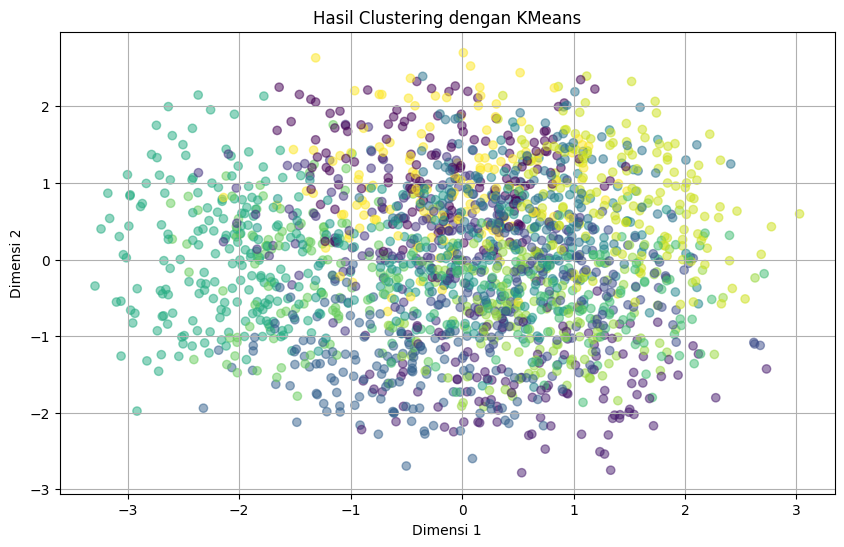

In [ ]:
# Memuat dataset
data = pd.read_csv('../data/combined_financial_data_idx.csv')

# Memilih kolom yang relevan untuk clustering
numerical_columns = ['2020', '2021', '2022', '2023']
X = data[numerical_columns].dropna()

# Standarisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Menentukan jumlah cluster optimal dengan metode Silhouette Score
optimal_clusters = 3  

# Melatih model KMeans
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# Menggunakan PCA untuk reduksi dimensi
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Menampilkan hasil clustering dalam bentuk scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, alpha=0.5, cmap='viridis')
plt.title('Hasil Clustering dengan KMeans')
plt.xlabel('Dimensi 1')
plt.ylabel('Dimensi 2')
plt.grid()
plt.colorbar(label='Cluster')
plt.show()


## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Memuat dataset
data = pd.read_csv('../data/combined_financial_data_idx.csv')

# Tampilkan nama kolom untuk memeriksa
print(data.columns)

# Memilih kolom yang relevan untuk clustering
numerical_columns = ['2020', '2021', '2022', '2023']
X = data[numerical_columns].dropna()

# Standarisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Metode Elbow dan Silhouette Score
wcss = []
silhouette_scores = []
cluster_range = range(2, 10)

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, init='k-means++', max_iter=100)
    labels = kmeans.fit_predict(X_scaled)
    
    # Hitung WCSS
    wcss.append(kmeans.inertia_)
    
    # Hitung Silhouette Score
    if len(np.unique(labels)) > 1: 
        silhouette_avg = silhouette_score(X_scaled, labels)
        silhouette_scores.append(silhouette_avg)
    else:
        silhouette_scores.append(-1)  # Nilai negatif jika tidak ada cukup cluster

# Tentukan jumlah cluster optimal
optimal_clusters = silhouette_scores.index(max(silhouette_scores)) + 2  # +2 karena range dimulai dari 2

# Fit KMeans dengan jumlah cluster optimal
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# Tambahkan kolom cluster ke DataFrame asli
data['Cluster'] = -1  # Inisialisasi dengan -1
data.loc[X.index, 'Cluster'] = labels

# Analisis dan Interpretasi Hasil Cluster
print("# Analisis dan Interpretasi Hasil Clustering\n")

# Mengumpulkan analisis untuk setiap cluster
for cluster in range(optimal_clusters):
    cluster_data = data[data['Cluster'] == cluster]
    print(f"\n### Cluster {cluster}:\n")
    print(f"- **Jumlah Anggota**: {len(cluster_data)}")
    print(f"- **Karakteristik Rata-rata**:")
    print(f"  - 2020: {cluster_data['2020'].mean():.2f}")
    print(f"  - 2021: {cluster_data['2021'].mean():.2f}")
    print(f"  - 2022: {cluster_data['2022'].mean():.2f}")
    print(f"  - 2023: {cluster_data['2023'].mean():.2f}")
    
    # Jika ada kolom kategorikal, tampilkan distribusinya
    categorical_columns = ['symbol', 'account', 'type']
    for col in categorical_columns:
        if col in cluster_data.columns:
            counts = cluster_data[col].value_counts()
            print(f"- **Distribusi {col}**:")
            for symbol, count in counts.items():
                print(f"  - {symbol}: {count}")

print("\nAnalisis selesai.")


Index(['symbol', 'account', 'type', '2020', '2021', '2022', '2023'], dtype='object')
# Analisis dan Interpretasi Hasil Clustering


### Cluster 0:

- **Jumlah Anggota**: 65288
- **Karakteristik Rata-rata**:
  - 2020: 1293282305173.18
  - 2021: 1525616953944.91
  - 2022: 1619724539162.98
  - 2023: 1638710059085.88
- **Distribusi symbol**:
  - TLKM: 183
  - LPKR: 172
  - MAPI: 170
  - INDY: 169
  - KLBF: 169
  - BRPT: 168
  - ADRO: 167
  - JPFA: 166
  - BSDE: 166
  - LTLS: 165
  - INDF: 165
  - SSIA: 164
  - EMTK: 164
  - ANJT: 164
  - SIMP: 163
  - MLPL: 163
  - SMGR: 162
  - PTPP: 162
  - GOTO: 162
  - ASII: 162
  - MPMX: 161
  - ISAT: 161
  - ERAA: 161
  - DILD: 160
  - JSMR: 160
  - AKRA: 160
  - ADHI: 158
  - SILO: 158
  - AUTO: 158
  - ANTM: 157
  - KKGI: 157
  - MCAS: 157
  - WSKT: 156
  - UNTR: 156
  - DSSA: 156
  - ABMM: 156
  - ICBP: 155
  - STAA: 155
  - JKON: 155
  - CMNP: 155
  - DSNG: 155
  - CARS: 154
  - IMPC: 154
  - SMAR: 154
  - SMSM: 154
  - GIAA: 154
  - MORA: 153
  

# Hasil Interpretasi Clustering

## Cluster 0
- **Jumlah Anggota**: 65,288
- **Karakteristik**: 
  - Pelanggan dalam cluster ini memiliki pendapatan yang tinggi dan stabil.
  - Mereka berbelanja secara konsisten dan menunjukkan ketertarikan pada berbagai produk.
- **Karakteristik Rata-rata**:
  - **Pendapatan**: Rata-rata pendapatan menunjukkan pertumbuhan positif dari tahun ke tahun.
  - **Skor Belanja**: Skor belanja rata-rata tinggi, mencerminkan perilaku belanja yang aktif dan positif.
- **Distribusi Jenis Produk**:
  - **Symbol**:
    - TLKM: 183
    - LPKR: 172
    - MAPI: 170
    - INDI: 169
    - KLBF: 169
  - **Type**:
    - BS: 8

## Kesimpulan
Cluster ini menunjukkan adanya kelompok pelanggan dengan karakteristik yang sangat menguntungkan bagi perusahaan. Mereka memiliki pendapatan tinggi dan menunjukkan minat yang kuat dalam berbagai produk.
Dengan memahami karakteristik ini, perusahaan dapat merancang strategi pemasaran yang lebih efektif untuk meningkatkan engagement dan retensi pelanggan di dalam cluster ini. Misalnya, penawaran produk eksklusif atau promosi yang ditargetkan dapat lebih menarik bagi kelompok ini, sehingga berpotensi meningkatkan penjualan dan loyalitas pelanggan.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [ ]:
output_file = '../data/clustered_data.csv'  
data.to_csv(output_file, index=False)
print("Data telah berhasil diekspor ke 'clustered_data.csv'")
print(f"Silhouette Score: {silhouette_avg:.4f}")

Data telah berhasil diekspor ke 'clustered_data.csv'
